In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite", echo=False)

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
query_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Print query result
print("Query Date: ", query_date)

Query Date:  ('2017-08-23',)


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
dt.date(2017, 8, 23) - dt.timedelta(days=365)

datetime.date(2016, 8, 23)

In [11]:
# Perform a query to retrieve the data and precipitation scores
query = session.query(Measurement.prcp, Measurement.date)\
        .filter(Measurement.date > '2016-08-23')\
        .filter(Measurement.date <= '2017-08-23')\
        .order_by(Measurement.date)\
        .all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(query, columns=["Precipitation", "Date"]).set_index('Date')

# Sort the dataframe by date
prcp_df = prcp_df.sort_index()

# print head
prcp_df.head(5)

,Precipitation
Date,
2016-08-24,2.0
2016-08-24,54.6
2016-08-24,57.9
2016-08-24,NaN
2016-08-24,31.0


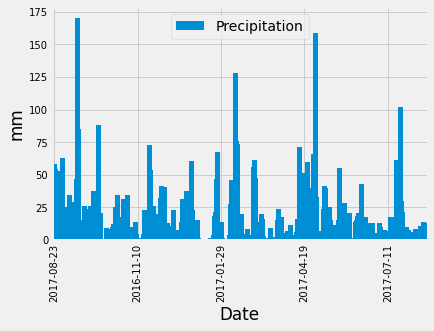

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(y="Precipitation", kind="bar", rot=90, fontsize=10, grid=True, width=30)

# Set tick locations every 250 
tick_locations = np.arange(-1, len(prcp_df), 500)

# Grab xtick values
x_ticks = prcp_df.iloc[tick_locations,:0]

# Grab xtick values
plt.xticks(tick_locations, x_ticks.index.values)

# set y-axis label
plt.ylabel("mm")

plt.show()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Measurement)\
                    .group_by(Measurement.station)\
                    .count()
    
# Print query result
print(f"There are {total_stations} stations in the 'Station' dataset.")

There are 9 stations in the 'Station' dataset.


In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station))\
                .group_by(Measurement.station)\
                .order_by(func.count(Measurement.station).desc())\
                .all()

# Create print statment to showcase station counts
row_counter = 0
for record in active_stations:
    (id, count) = record
    if row_counter == 0:
        print(f"The station id with the highest count is id: {id}, with a count of: {count}.")
        row_counter = 1
    else:
        print(f"The station id: {id} has a count of: {count}.")


The station id with the highest count is id: USC00519281, with a count of: 2772.
The station id: USC00519397 has a count of: 2724.
The station id: USC00513117 has a count of: 2709.
The station id: USC00519523 has a count of: 2669.
The station id: USC00516128 has a count of: 2612.
The station id: USC00514830 has a count of: 2202.
The station id: USC00511918 has a count of: 1979.
The station id: USC00517948 has a count of: 1372.
The station id: USC00518838 has a count of: 511.


In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_query = session.query(Measurement.station, func.min(Measurement.tobs)\
                , func.max(Measurement.tobs)\
                , func.round(func.AVG(Measurement.tobs),2))\
                .filter(Measurement.station == "USC00519281")\
                .all()

# Print query result
for record in station_query:
    (id, min, max, mean) = record
    print(f"Station id: {id} had a min temperature of {min}, a max temperature of {max} and an average temperature of {mean}.")
        

Station id: USC00519281 had a min temperature of 12.2, a max temperature of 29.4 and an average temperature of 22.04.


In [17]:
# Quering to get the most recent date recorded for station USC00519281
recent_date_query_station = session.query(Measurement.date)\
                            .filter(Measurement.station == "USC00519281")\
                            .order_by(Measurement.date.desc())\
                            .first()

# Calculating 365 days prior to the recent date
year_from_recent = dt.date(2017, 8, 18) - dt.timedelta(days=365)

# Print output
print(f"The most recent date is {recent_date_query_station}, and 365 days prior is {year_from_recent}.")

The most recent date is ('2017-08-18',), and 365 days prior is 2016-08-18.


In [18]:
# Query the last 12 months of temperature observation data for station ID USC00519281
year_query_data_station = session.query(Measurement.date, Measurement.tobs)\
                        .filter(Measurement.station == "USC00519281")\
                        .filter(Measurement.date > '2016-08-18')\
                        .filter(Measurement.date <= '2017-08-18')\
                        .order_by(Measurement.date)\
                        .all()

# Putting queried data into a Pandas DataFrame
frequent_station_df = pd.DataFrame(year_query_data_station, columns=["Date", "tobs"])

# Print head
frequent_station_df.head(5)

,Date,tobs
0,2016-08-19,26.1
1,2016-08-20,27.2
2,2016-08-21,26.1
3,2016-08-22,25.6
4,2016-08-23,25.0


Text(0.5, 1.0, '12 Months of Temperature Observation')

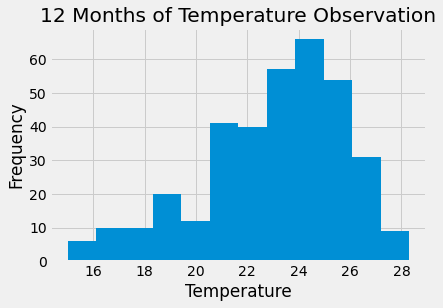

In [19]:
# Using the most active station id
# plot the results as a histogram
frequent_station_df.hist(column="tobs", grid=True, bins=12)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("12 Months of Temperature Observation")

# Close session

In [20]:
# Close Session
session.close()